# Assess the impact of fly genotype, replicate and passage on DCV titers. 
Note that, in every passage we infect with the same amount of virus. 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest
import statsmodels.api as sm
from bioinfokit.analys import stat
import scipy.stats as stats
from statannotations.Annotator import Annotator

In [9]:
our_color_palette ={"WT": "#F2C14E", "KO": "#F15BB5", "OE": "#368F8B"}
genotype_order = ["WT", "KO", "OE"]
passage_order = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10']

In [10]:
# import the values
 
df = pd.read_csv('../../resources/measurements/20220926-RNAi_evolution_Titers_overview_formatted.csv')
df.head(5)

,passage,genotype,replicate,DCV_titer
0,P1,WT,a,1.700000e+09
1,P2,WT,a,3.160000e+09
2,P3,WT,a,1.000000e+10
3,P4,WT,a,4.640000e+09
4,P5,WT,a,2.150000e+09


In [4]:
# log-transform titer values to "normalize" data distribution 
df["log_DCV_titer"] = np.log10(df['DCV_titer'])

## Compare titers between genotype for each passage

In [5]:
# test normalitiy --> H0: samples comes from normal distribution
print(normaltest(df[df['genotype']=="WT"]['log_DCV_titer']).pvalue)
print(normaltest(df[df['genotype']=="OE"]['log_DCV_titer']).pvalue)
print(normaltest(df[df['genotype']=="KO"]['log_DCV_titer']).pvalue)
print(normaltest(df['log_DCV_titer']).pvalue)

0.40239803723143225
0.7239254330641363
0.6609943411204602
0.6032959064952662


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

P2_KO vs. P2_OE: t-test independent samples, P_val:1.359e-01 t=1.658e+00
P3_WT vs. P3_KO: t-test independent samples, P_val:1.228e-01 t=-1.725e+00
P3_KO vs. P3_OE: t-test independent samples, P_val:4.883e-01 t=7.264e-01
P4_WT vs. P4_KO: t-test independent samples, P_val:9.066e-01 t=-1.212e-01
P4_KO vs. P4_OE: t-test independent samples, P_val:4.730e-01 t=-7.530e-01
P5_WT vs. P5_KO: t-test independent samples, P_val:1.341e-02 t=-3.159e+00
P5_KO vs. P5_OE: t-test independent samples, P_val:6.500e-02 t=2.138e+00
P6_WT vs. P6_KO: t-test independent samples, P_val:1.459e-01 t=-1.611e+00
P6_KO vs. P6_OE: t-test independent samples, P_val:8.749e-01 t=1.626e-01
P7_WT vs. P7_KO: t-test independent samples, P_val:5.685e-01 t=-5.947e-01
P7_KO vs. P7_OE: t-test independent samples, P_val:1.127e-01 t=1.781e+00
P8_WT vs. 

(<AxesSubplot: xlabel='passage', ylabel='DCV_titer'>,
  <statannotations.Annotation.Annotation at 0x7f7bde2fe070>])

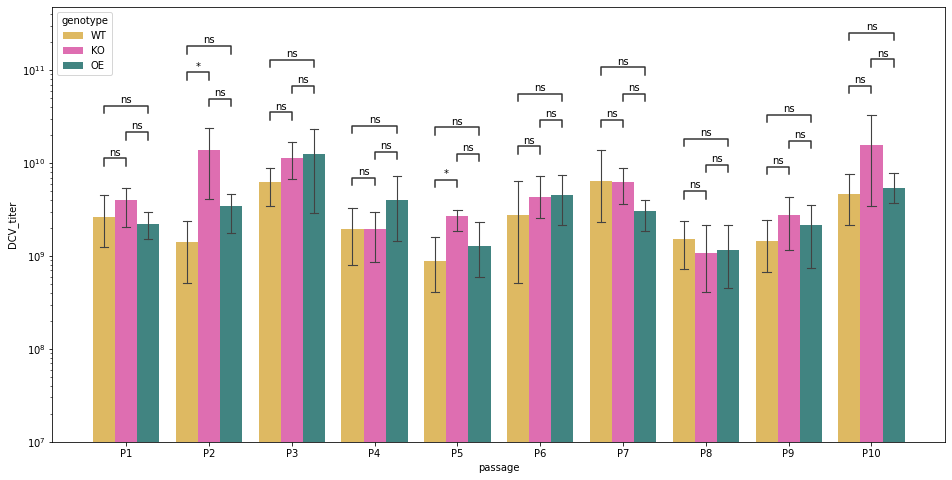

In [6]:
fig, ax = plt.subplots(1,1,  sharey=True, figsize=(16,8))


sns.barplot(
            ax=ax,
            data=df,
            x="passage", 
            y="DCV_titer",
            hue="genotype", 
            hue_order=genotype_order,
            order=passage_order, 
            palette=our_color_palette,
            errwidth=1.1, 
            capsize=0.1,
            )
plt.yscale('log')
plt.ylim((10**7, 10**11))


pairs = [(("P1", "WT"), ("P1", "KO")),
         (("P1", "WT"), ("P1", "OE")),
         (("P1", "OE"), ("P1", "KO")),
         
         (("P2", "WT"), ("P2", "KO")),
         (("P2", "WT"), ("P2", "OE")),
         (("P2", "OE"), ("P2", "KO")),
         
         (("P3", "WT"), ("P3", "KO")),
         (("P3", "WT"), ("P3", "OE")),
         (("P3", "OE"), ("P3", "KO")),
         
         (("P4", "WT"), ("P4", "KO")),
         (("P4", "WT"), ("P4", "OE")),
         (("P4", "OE"), ("P4", "KO")),
         
         (("P5", "WT"), ("P5", "KO")),
         (("P5", "WT"), ("P5", "OE")),
         (("P5", "OE"), ("P5", "KO")),
         
         (("P6", "WT"), ("P6", "KO")),
         (("P6", "WT"), ("P6", "OE")),
         (("P6", "OE"), ("P6", "KO")),
         
         (("P7", "WT"), ("P7", "KO")),
         (("P7", "WT"), ("P7", "OE")),
         (("P7", "OE"), ("P7", "KO")),
         
         (("P8", "WT"), ("P8", "KO")),
         (("P8", "WT"), ("P8", "OE")),
         (("P8", "OE"), ("P8", "KO")),
         
         (("P9", "WT"), ("P9", "KO")),
         (("P9", "WT"), ("P9", "OE")),
         (("P9", "OE"), ("P9", "KO")),
         
         (("P10", "WT"), ("P10", "KO")),
         (("P10", "WT"), ("P10", "OE")),
         (("P10", "OE"), ("P10", "KO")),
         
        ]


# subset the table otherwise the stats were calculated on the whole dataset
annot = Annotator(ax,
                  pairs, 
                  data=df, 
                  x="passage", 
                  y="log_DCV_titer",
                  hue="genotype", 
                  hue_order=genotype_order,
                  order=passage_order, 
                  palette=our_color_palette,
                  ) 
annot.configure(test='t-test_ind',loc='inside', verbose=2)
annot.apply_test().annotate()

In [8]:
fig.savefig("./000__Manuscript_figures/Figure_1C__viral_titers.pdf")
fig.savefig("./000__Manuscript_figures/Figure_1C__viral_titers.svg")

## mixed ANOVA 

In [25]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
import matplotlib.pyplot as plt
import numpy as np
import pingouin as pg

In [36]:
df["DCV_titer_log"] = np.log(df["DCV_titer"])

df

,passage,genotype,replicate,DCV_titer,DCV_titer_log,id
0,P1,WT,a,1.700000e+09,21.253894,P1WT
1,P2,WT,a,3.160000e+09,21.873838,P2WT
2,P3,WT,a,1.000000e+10,23.025851,P3WT
3,P4,WT,a,4.640000e+09,22.257980,P4WT
4,P5,WT,a,2.150000e+09,21.488734,P5WT
...,...,...,...,...,...,...
145,P6,OE,e,4.640000e+09,22.257980,P6OE
146,P7,OE,e,4.640000e+09,22.257980,P7OE
147,P8,OE,e,1.000000e+09,20.723266,P8OE
148,P9,OE,e,2.150000e+09,21.488734,P9OE


In [39]:
df["passage"].unique()

array(['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10'],
      dtype=object)

In [35]:
df['id'] = df['passage'] + df['genotype']

res = pg.mixed_anova(dv='DCV_titer_log', 
                      within='passage', 
                      between='genotype',
                      subject='id', 
                      data=df[['DCV_titer_log', 'passage', 'genotype', 'id']], 
                     )

res

ValueError: cannot convert float NaN to integer

## this is normal two-way anova

In [21]:
# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
res = stat()
res.anova_stat(df=df, res_var='DCV_titer_log', anova_model='DCV_titer_log ~ genotype * passage')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
genotype,2.0,11.970029,5.985014,6.221015,2.687354e-03
passage,9.0,57.851611,6.427957,6.681424,1.028270e-07
genotype:passage,18.0,14.980432,0.832246,0.865063,6.208611e-01
Residual,120.0,115.447669,0.962064,NaN,NaN


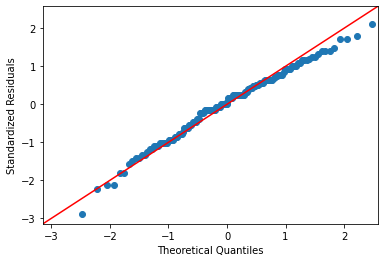

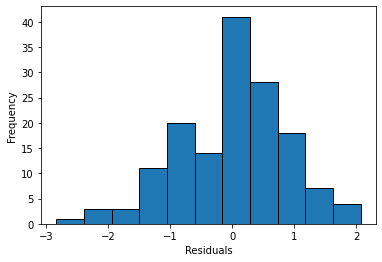

In [22]:
# test ANOVA assumptions

# QQ-plot
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [24]:
# Shapiro-Wilk test can be used to check the normal distribution of residuals. 
# Null hypothesis: data is drawn from normal distribution.

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('DCV_titer_log ~ C(genotype) * C(passage)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table


import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)


0.9883164167404175 0.24316149950027466


In [17]:
model = ols('DCV_titer ~ genotype * passage', data=df_formatted).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

NameError: name 'df_formatted' is not defined